<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Semanal Nº1 : Primeros pasos en la simulación
#### Houziaux Adèle

<img src="./france.png" align="right" width="75" /> 

# Consigna

En este primer trabajo comenzaremos por diseñar un generador de señales que utilizaremos en las primeras simulaciones que hagamos. La primer tarea consistirá en programar una función que genere señales senoidales y que permita parametrizar:

la amplitud máxima de la senoidal (volts)
su valor medio (volts)
la frecuencia (Hz)
la fase (radianes)
la cantidad de muestras digitalizada por el ADC (# muestras)
la frecuencia de muestreo del ADC.
es decir que la función que uds armen debería admitir se llamada de la siguiente manera

tt, xx = mi_funcion_sen( vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs)
Recuerden que tanto xx como tt deben ser vectores de Nx1. Puede resultarte útil el módulo de visualización matplotlib.pyplot donde encontrarán todas las funciones de visualización estilo Matlab. Para usarlo:

import matplotlib.pyplot as plt
plt.plot(tt, xx)
Entrega
Recuerden que solo tienen que entregar una URL a su notebook. Con esa URL ya tendré acceso a su repositorio y todo lo que usaron.

https://nbviewer.jupyter.org/github/marianux/PDS/blob/main/preparacion.ipynb


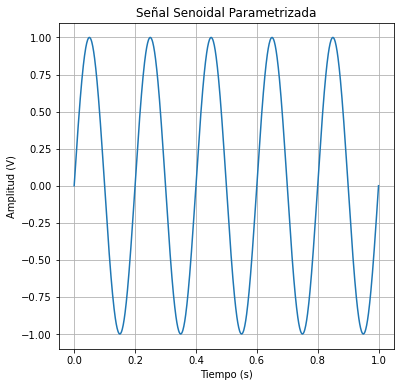

In [12]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

import pdsmodulos as pds
import numpy as np
import matplotlib.pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
plt.rcParams['figure.figsize'] = (6,6)

# Función que genera una señal senoidal parametrizada
def mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000):
    """
    Genera una señal senoidal con parámetros especificados.

    Parámetros:
    vmax : Amplitud máxima de la senoidal (volts)
    dc : Valor medio de la señal (volts)
    ff : Frecuencia de la señal (Hz)
    ph : Fase de la señal (radianes)
    nn : Cantidad de muestras digitalizadas por el ADC (# muestras)
    fs : Frecuencia de muestreo del ADC (Hz)

    Retorno:
    tt : Vector de tiempo de Nx1
    xx : Vector de señal senoidal de Nx1
    """
    # Vector de tiempo
    tt = np.linspace(0, nn/fs, nn)
    
    # Generar la señal senoidal
    xx = vmax * np.sin(2*np.pi*ff*tt+ph)+dc
    
    return tt, xx

# Parámetros de ejemplo
vmax = 1       # Amplitud máxima
dc = 0         # Valor medio
ff = 5       # Frecuencia en Hz
ph = 0         # Fase en radianes
nn = 1000      # Número de muestras
fs = 1000      # Frecuencia de muestreo en Hz

# Generar la señal senoidal
tt, xx = mi_funcion_sen(vmax=vmax, dc=dc, ff=ff, ph=ph, nn=nn, fs=fs)

# Visualizar la señal
plt.plot(tt, xx)
plt.title("Señal Senoidal Parametrizada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.grid(True)
plt.show()


Comentarios :

La importancia de elegir una buena frecuencia de muestreo es crucial en el procesamiento de señales, especialmente cuando se trabaja con señales periódicas como una sinusoidal. El concepto central aquí es el teorema de Nyquist-Shannon, que establece que para muestrear correctamente una señal analógica sin pérdida de información, la frecuencia de muestreo (fs) debe ser al menos dos veces mayor que la frecuencia máxima de la señal (ff).

Fenómenos que pueden aparecer :

1) Plegamiento de espectro (fs BAJA, fs << ff)

Cuando la frecuencia de muestreo (fs) es demasiado baja (es decir, menos del doble de la frecuencia de la señal), ocurre un fenómeno llamado aliasing, donde la señal muestreada aparece con una frecuencia incorrecta, o incluso como una señal completamente diferente. Por ejemplo, si tenemos una señal sinusoidal de 5 Hz (ff=5Hz) y la muestreas a 8 Hz (fs=8 Hz), vamos a ver una señal con una frecuencia errónea.

2) Pérdida de información (fs BAJA, fs << ff)

Cuando fs es demasiado baja, no solo se deforma la señal, sino que también se perde la información contenida en la señal original. Entonces, no podemos reconstruir la señal original a partir de las muestras.

3) Redundancia (fs ALTA, fs >> ff)

Por el contrario, si la frecuencia de muestreo (fs) es demasiado alta, esto puede llevar a una redundancia de datos, lo que significa que estamos almacenando o procesando más datos de los necesarios, sin obtener información adicional.

vídeos utilizados para comprender mejor el curso
https://www.youtube.com/watch?v=a1_E4xXNYgQ&list=PLIlsLCejddaMFV7oTq6bj6lJliYNXkyxT&index=4
